In [1]:
# Data generating distribution and convergence of linear regression

In [1]:
# Run this code to see markdowns easier
# Adapted from code generated by ChatGPT (OpenAI, 2025)
# Prompt: "how to make markdown cells a different color in jupyter notebooks"
from IPython.display import Javascript

Javascript("""
var style = document.createElement('style');
style.innerHTML = `
  /* Target Markdown cells only */
  .jp-Notebook .jp-MarkdownOutput {
      background-color: #d8f0ff !important;
      border: none !important;           /* remove border */
      border-radius: 10px;
      padding: 12px !important;
      box-shadow: 0 0 8px rgba(112, 174, 224, 0.3);
  }
`;
document.head.appendChild(style);
""")

<IPython.core.display.Javascript object>

# Data Generating Distribution and Convergence of Linear Regression
## Generating synthetic dataset

In [9]:
# Experiment with numpy.random.normal
import numpy as np
a = np.random.normal(168, 30, size=2)
print(a)
a.shape

[149.12357326 110.03730174]


(2,)

I generated a synthetic dataset based on a linear model with additive Gaussian noise using the following data generating process:
        
        Y = alpha + beta X + epsilon
Where each realization of ε is a single random value drawn from a normal distribution with mean 0 and standard deviation 20.

To generate a random input space, I generated these X values from a normal distribution as well. Each realization of X is also a single random value drawn from a normal distribution with a mean 168 and standard deviation 30.

Most importantly, I set alpha = 20, and  beta = 0.5.

In [17]:
# Generate one synthetic dataset
number_of_samples = 10
alpha = 20
beta = 0.5
X = np.random.normal(168, 30, size=number_of_samples).reshape(-1,1)
Y = alpha + beta * X + np.random.normal(0, 20, size=number_of_samples).reshape(-1,1)
Y.shape
Y

array([[114.86515818],
       [154.85444668],
       [173.98868108],
       [110.79627741],
       [121.36077989],
       [ 91.25897211],
       [ 93.46414028],
       [105.02717971],
       [ 89.33269864],
       [106.35165489]])

## Running linear regression on various sample sizes
I generated datasets using the data generating process of sample size n = 10^2, 10^3, 10^4, 10^5, 10^6. Then I ran a linear regression on each of these datasets.

In [19]:
# Function to generate any n-size dataset
def generate_dataset(number_of_samples=10):
    alpha = 20
    beta = 0.5
    X = np.random.normal(168, 30, size=number_of_samples).reshape(-1,1)
    Y = alpha + beta * X + np.random.normal(0, 20, size=number_of_samples).reshape(-1,1)
    return X,Y

In [23]:
# Generate datasets
datasets = {}
sample_sizes = [10,10**3,10**4,10**5,10**6]
for size in sample_sizes:
    datasets[size] = generate_dataset(size)
datasets[1000][0].shape

(1000, 1)

In [30]:
# Define linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model(X,Y):
    sk_model = LinearRegression()
    sk_model.fit(X, Y)
    r2 = sk_model.score(X, Y)
    return sk_model.coef_.item(), sk_model.intercept_.item(), r2

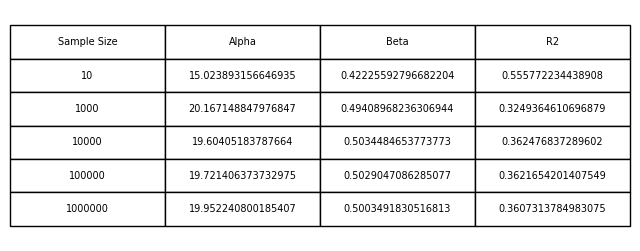

In [32]:
# Run linear regressions
# This is adapted code from HW1
# Adapted from code generated by ChatGPT (OpenAI, 2025)
# Prompt: "how do i create a table"
import matplotlib.pyplot as plt

sizes = sample_sizes
alphas = []
betas = []
r2s = []
for size, (X, Y) in datasets.items():
    b_calc, a_calc, r2 = model(X,Y)
    alphas.append(a_calc)
    betas.append(b_calc)
    r2s.append(r2)

table_data = list(zip(sizes, alphas, betas, r2s))
fig, ax = plt.subplots(figsize=(8,3))
ax.axis('off')  # hide axes

# Create the table
table = ax.table(cellText=table_data,
                 colLabels=['Sample Size', 'Alpha', 'Beta', 'R2'],
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(True)
table.scale(1, 2) 
plt.show()

## Discussion of convergence
Running linear regression on increasing sample sizes shows that the weight coefficient converges close to 20 and the bias coefficient converges to 0.5. This shows that the calculated model coefficients converge to the actual coefficients of alpha and beta used in the true data generating process. It seems like the R^2 score converges to 0.36, not 0.

In [ ]:
# Observations
# The Alpha converges to 20 and the Beta converges to 0.5
# These are the alpha and beta values we chose during the data generating process

# The R2 converges to 0.36, not 0.

## Convergence of R^2

With the assumption that the model parameters for  alpha and beta converge to the true data generating values, we can show that the R^2 score converges to (1 − var(epsilon)/var(Y).

![derivation of R2 convergence](images-for-writeup/r2conv.png)

## Alternative models for R2 convergence
In the above section, it was shown that an appropriate linear model will converge to (1 − var(epsilon)/var(Y )). These values are only dependent on the properties of the data generating distribution itself, and no score loss is contributed by model parameters. So it is mathematically impossible to improve from this inherent noise of the data points themselves. Thus, we cannot improve the asymptotic R^2 score.

In other words, the optimized linear model got as close to the data generating distribution as possible, with the exception of random additive gaussian noise. We saw this in the R^2 score derivation, where the numerator canceled out all terms except epsilon. Trying to deviate and get a "better" model will only add more separation between the predictions and the non-additive portion of the data generating distribution.

## Important characteristics of data generating distribution
As seen in this example, the R^2 score depends on 1 − var(epsilon)/var(Y )). This means that a "poor" model will emerge if the variance of the error is extremely high compared to the variance of the label; this occurs when the noise variance is high compared to the variance in the input.

Thus, a "good" model with good evaluation metrics also depends on the underlying data generating distribution having a combination of narrow noise variance and wide distribution of inputs.

Additionally, beyond a good evaluation metric, we would ideally have a large sample size so that the model parameters can converge towards the true data generating constants.